In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.datasets import load_diabetes

In [3]:
# Loading in Relevant Data
#------------------------------------------------------------------------
diabetes = load_diabetes(scaled = True)     
df = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes.target

def MaleOrFemale(x):
    if x < 0: return 0
    return 1

df['sex'] = df['sex'].apply(lambda x: MaleOrFemale(x))
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,1,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,0,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,1,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,0,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,0,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,1,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,1,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,1,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,0,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


Provided math behind PCA in other Repo. PCR is based off Principal Components

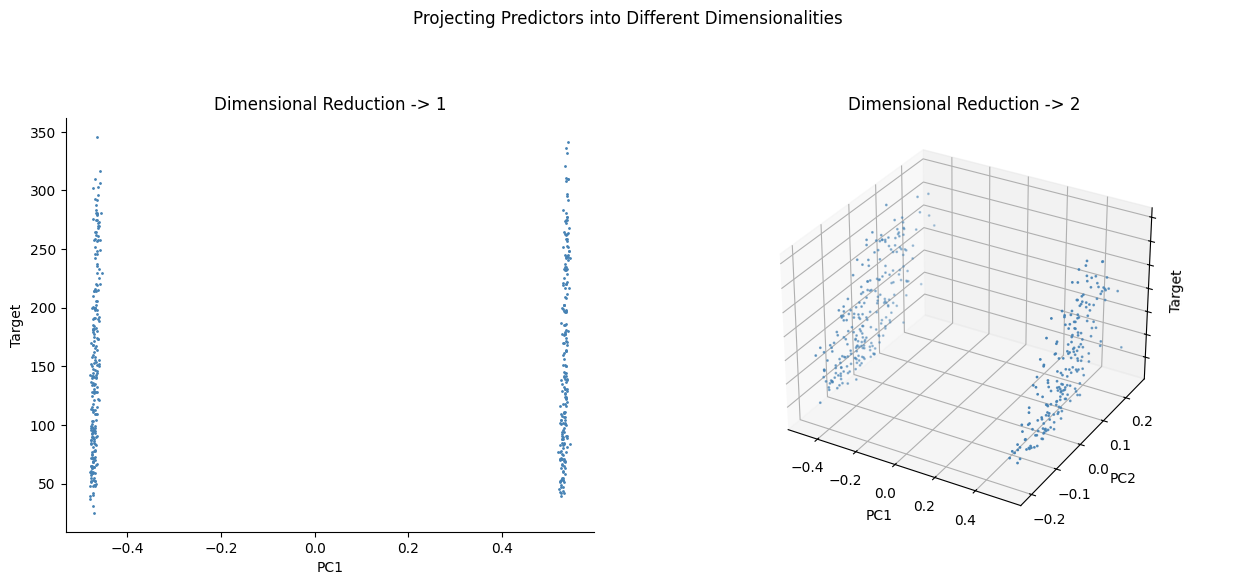

In [46]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

colnames = df.columns.drop('target')
pca = PCA(n_components = 1)

pca.fit(df[colnames])
transformed_predictor = pca.transform(df[colnames])

fig, axs = plt.subplots(1, 2, figsize = (15,6))


axs[0].scatter(transformed_predictor, df['target'], color = 'steelblue', s = 1)
axs[0].set_xlabel('PC1')
axs[0].set_ylabel('Target')
axs[0].set_title('Dimensional Reduction -> 1')
axs[0].spines[['right', 'top']].set_visible(False)

pca = PCA(n_components = 2)
pca.fit(df[colnames])
transformed_predictor = pca.transform(df[colnames])

axs[1].spines[['left', 'right', 'top', 'bottom']].set_visible(False)
axs[1].set_xticks([])
axs[1].set_yticks([])

axs[1] = fig.add_subplot(122, projection = '3d')
axs[1].scatter(transformed_predictor[:, 0], transformed_predictor[:, 1], df['target'], color = 'steelblue', s = 1)
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')
axs[1].set_zticklabels([])
axs[1].set_title('Dimensional Reduction -> 2')
axs[1].set_zlabel('Target', labelpad = -8)

fig.suptitle('Projecting Predictors into Different Dimensionalities')
fig.subplots_adjust(top = 0.8, hspace=0.4) 
plt.show()


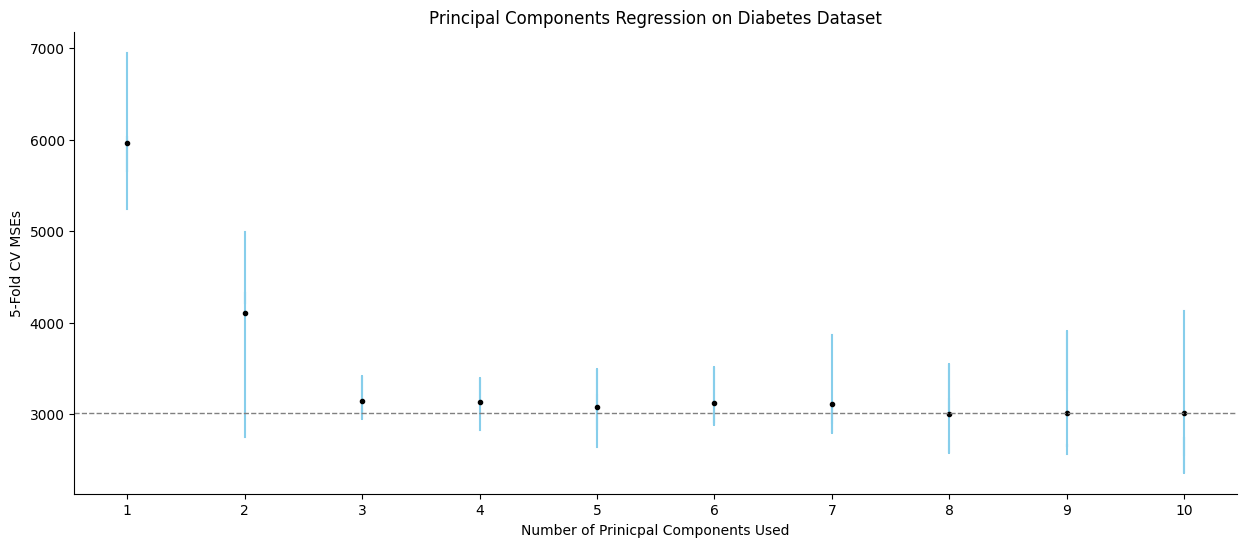

In [91]:
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

# Initialize PCA with desired number of components

colnames = df.columns.drop('target')

fig = plt.figure(figsize = (15,6))

for i in range(1, len(colnames) + 1):

    pca = PCA(n_components = i)

    pca.fit(df[colnames])
    transformed_predictor = pca.transform(df[colnames])

    cross_validation = KFold(n_splits = 5, shuffle = True)

    neg_MSEs = cross_val_score(estimator = LinearRegression(), 
                            X = transformed_predictor, 
                            y = df['target'],
                            cv = cross_validation, 
                            scoring = 'neg_mean_squared_error')
    
    plt.plot([i] * 5, -neg_MSEs, color = 'skyblue')
    plt.plot([i], -np.mean(neg_MSEs), marker = 'o', markersize = 3, color = 'black')
    if i == len(colnames):
        plt.axhline(-np.mean(neg_MSEs), color = 'gray', linestyle = '--', linewidth = 1)

plt.title('Principal Components Regression on Diabetes Dataset')
plt.xticks(range(1, 11))
plt.gca().spines[['right', 'top']].set_visible(False)
plt.xlabel('Number of Prinicpal Components Used')
plt.ylabel('5-Fold CV MSEs')
plt.show()
